- techniques
  - log
  - exponential
  - reciprocal
  - power
    - box-cox (PowerTransformer - sklearn.preprocessing)
    - yea-jhonson(PowerTransformer - sklearn.preprocessing)
  - sqrt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\Rajasri\Documents\DATA SCIENCE Naresh IT\Data files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


- data has 3 types of distribution
  - normal distribution
  - positive skewed
  - negative skewed

- by assumption, all math concepts developed by normal distribution
- skew forms many dist, one reason is outliers
- once we perform outlier analysis, apply transformation, if data doesnt transform normality

- techniques
  - log
  - exponential
  - reciprocal
  - power
  - sqrt

- eg

In [5]:
exp_data=np.random.exponential(size=10000)
exp_data

array([1.53981082, 0.91454078, 0.02779443, ..., 2.89148228, 2.44023719,
       1.37537984])

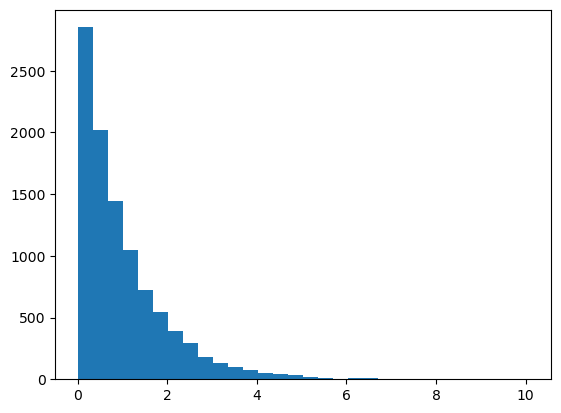

In [6]:
plt.hist(exp_data,bins=30)
plt.show()

In [7]:
nor_data=np.random.normal(size=10000)
nor_data

array([-0.42808136,  0.17799974,  0.41740494, ...,  0.15792525,
       -0.7283751 , -0.60737765])

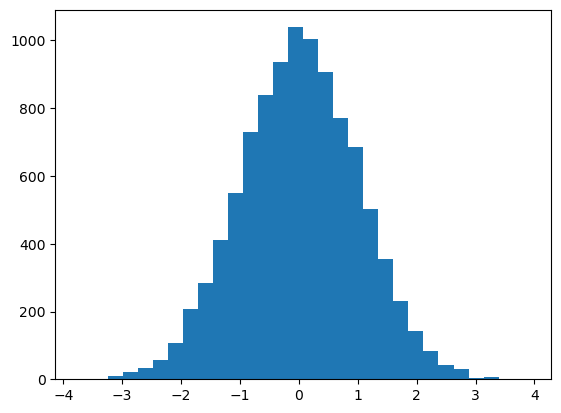

In [8]:
plt.hist(nor_data,bins=30)
plt.show()

- goal: convert exp to normal

### log

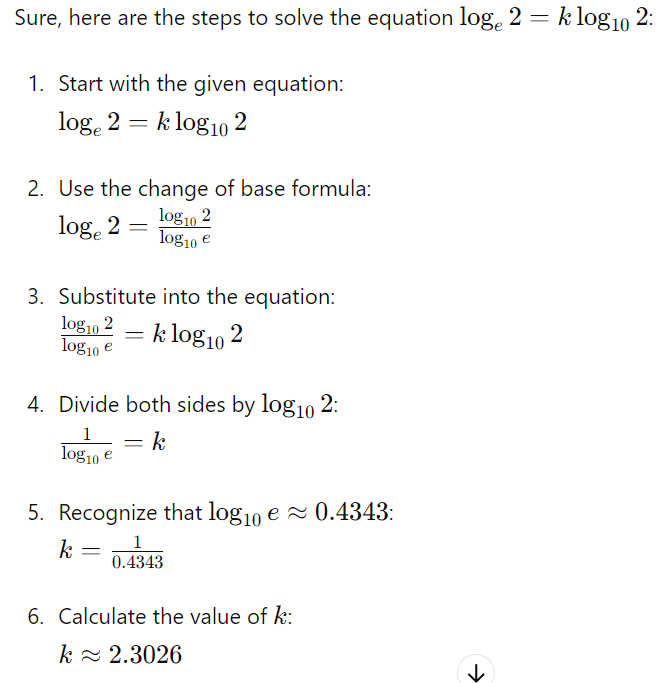

In [11]:
from PIL import Image
Image.open(r"C:\Users\Rajasri\Pictures\Screenshots\Screenshot 2024-06-13 115449.png")

In [12]:
x=2
np.log(x)

0.6931471805599453

In [16]:
log_data=np.log(exp_data)
log_data

array([ 0.43165956, -0.08933322, -3.58291969, ...,  1.06176927,
        0.89209524,  0.31872994])

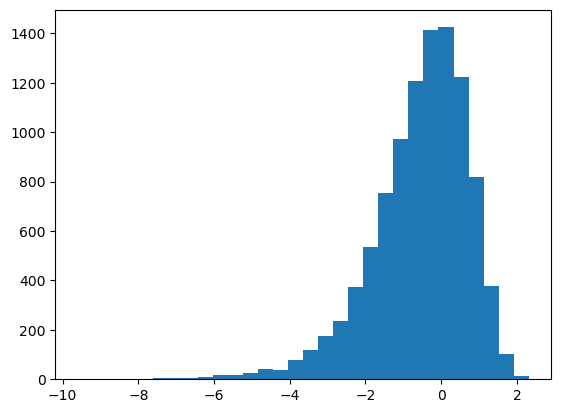

In [17]:
plt.hist(log_data,bins=30)
plt.show()

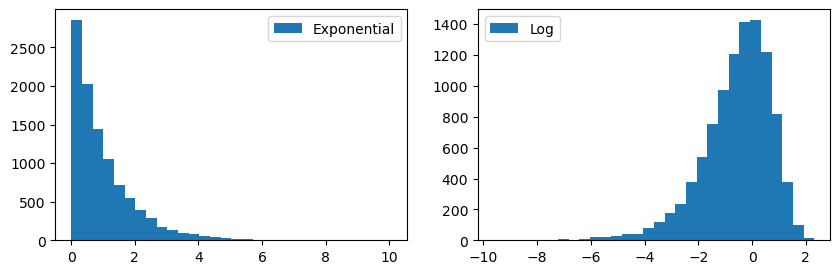

In [19]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).hist(exp_data,bins=30,label="Exponential")
plt.legend()
plt.subplot(1,2,2).hist(log_data,bins=30,label="Log")
plt.legend()
plt.show()

### reciprocal

x=1/x

In [20]:
exp_data=np.random.exponential(size=10000)
reci_data=np.reciprocal(exp_data)
reci_data

array([9.85652141, 3.69780024, 0.6778598 , ..., 0.54393997, 6.52944203,
       2.15614517])

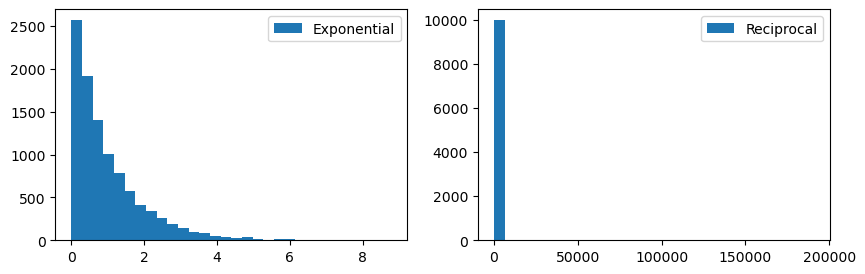

In [21]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).hist(exp_data,bins=30,label="Exponential")
plt.legend()
plt.subplot(1,2,2).hist(reci_data,bins=30,label="Reciprocal")
plt.legend()
plt.show()

- fail when values are low

### sqrt

In [22]:
exp_data=np.random.exponential(size=10000)
sqrt_data=np.sqrt(exp_data)
sqrt_data

array([1.00250061, 0.65202626, 1.3957621 , ..., 1.29526471, 0.67289866,
       1.80910468])

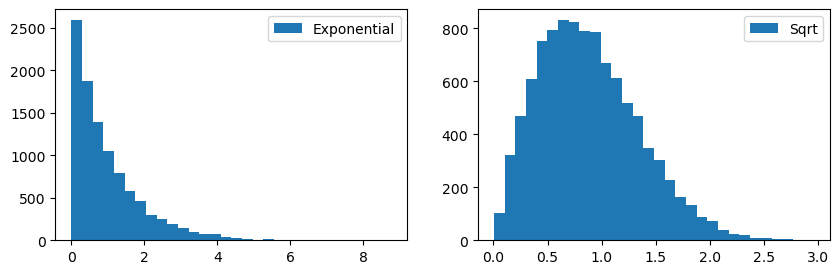

In [23]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).hist(exp_data,bins=30,label="Exponential")
plt.legend()
plt.subplot(1,2,2).hist(sqrt_data,bins=30,label="Sqrt")
plt.legend()
plt.show()

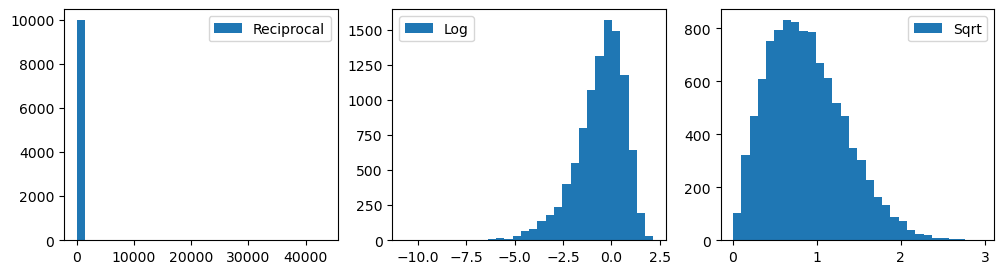

In [24]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1).hist(np.reciprocal(exp_data),bins=30,label="Reciprocal")
plt.legend()
plt.subplot(1,3,2).hist(np.log(exp_data),bins=30,label="Log")
plt.legend()
plt.subplot(1,3,3).hist(np.sqrt(exp_data),bins=30,label="Sqrt")
plt.legend()
plt.show()

### power

- under sklearn
  - Box cox
  - ye-jhonson

In [25]:
from sklearn.preprocessing import PowerTransformer

exp_data=np.random.exponential(size=10000)

pt=PowerTransformer(method="box-cox")
boxcox=pt.fit_transform(exp_data.reshape(-1,1))
boxcox

array([[-0.53476399],
       [-1.10931697],
       [ 0.0017317 ],
       ...,
       [-0.18025458],
       [ 0.41235513],
       [-1.15570228]])

In [26]:
from sklearn.preprocessing import PowerTransformer

exp_data=np.random.exponential(size=10000)

pt=PowerTransformer(method="yeo-johnson")
yeajohnson=pt.fit_transform(exp_data.reshape(-1,1))
yeajohnson

array([[ 2.09676739],
       [-0.24296674],
       [-0.52376623],
       ...,
       [ 0.13171137],
       [ 1.37568818],
       [ 1.58152044]])

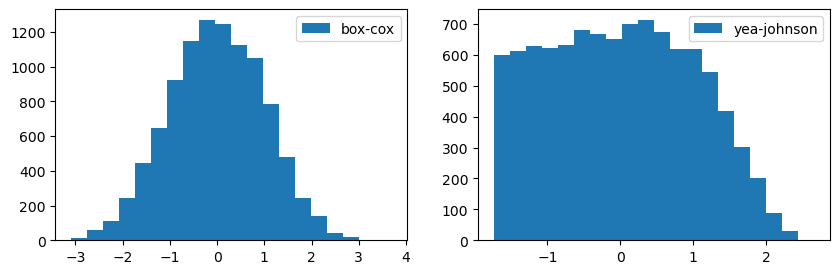

In [27]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).hist(boxcox,bins=20,label="box-cox")
plt.legend()
plt.subplot(1,2,2).hist(yeajohnson,bins=20,label="yea-johnson")
plt.legend()
plt.show()

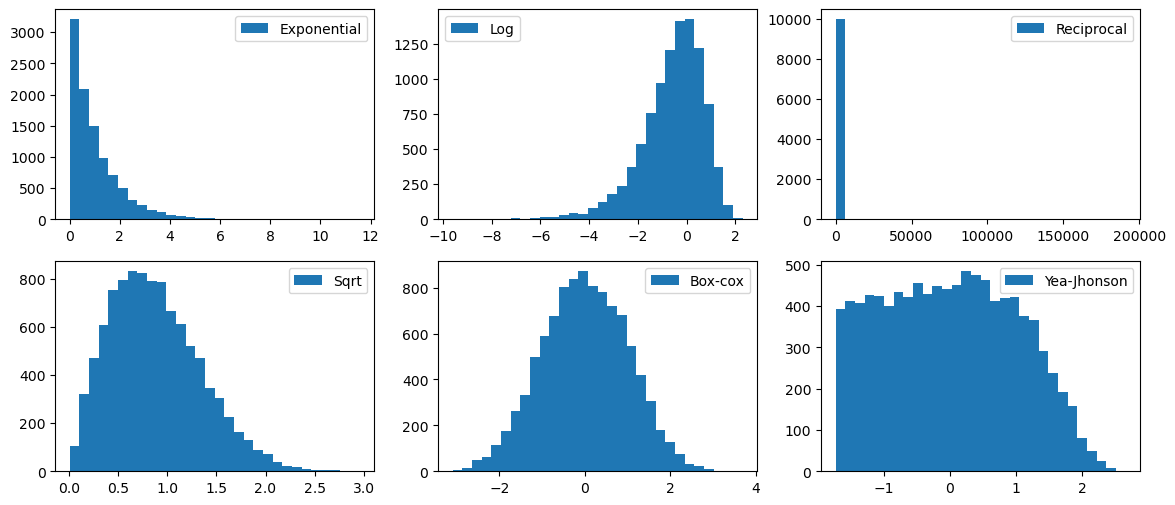

In [30]:
plt.figure(figsize=(14,6))
plt.subplot(2,3,1).hist(exp_data,bins=30,label="Exponential")
plt.legend()
plt.subplot(2,3,2).hist(log_data,bins=30,label="Log")
plt.legend()
plt.subplot(2,3,3).hist(reci_data,bins=30,label="Reciprocal")
plt.legend()
plt.subplot(2,3,4).hist(sqrt_data,bins=30,label="Sqrt")
plt.legend()
plt.subplot(2,3,5).hist(boxcox,bins=30,label="Box-cox")
plt.legend()
plt.subplot(2,3,6).hist(yeajohnson,bins=30,label="Yea-Jhonson")
plt.legend()
plt.show()